In [1]:
import stumpy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd

In [8]:
from scipy.io import loadmat
mat_contents = loadmat('penguinshort.mat')
result = [x[0] for x in mat_contents['penguinshort']]
print(result)

[0.203857, 0.203857, 0.179932, 0.191895, 0.191895, 0.167969, 0.167969, 0.155762, 0.119873, 0.131836, 0.155762, 0.179932, 0.191895, 0.143799, 0.131836, 0.10791, 0.119873, 0.131836, 0.131836, 0.119873, 0.119873, 0.10791, 0.0959473, 0.0959473, 0.131836, 0.0358887, 0.0119629, 0.0358887, 0.0119629, -0.0358887, -0.0358887, -0.0717773, -0.0239258, 0.0717773, 0.0839844, 0.0959473, 0.0959473, 0.119873, 0.119873, 0.10791, 0.0839844, 0.10791, 0.0959473, 0.119873, 0.155762, 0.155762, 0.10791, 0.0839844, 0.10791, 0.155762, 0.191895, 0.227783, 0.251953, 0.251953, 0.263916, 0.21582, 0.21582, 0.23999, 0.23999, 0.21582, 0.21582, 0.203857, 0.203857, 0.203857, 0.191895, 0.167969, 0.131836, 0.155762, 0.119873, 0.0959473, 0.0717773, 0.0717773, 0.0598145, 0.0717773, 0.0839844, 0.0959473, 0.143799, 0.167969, 0.263916, 0.263916, 0.275879, 0.275879, 0.23999, 0.323975, 0.359863, 0.323975, 0.275879, 0.23999, 0.23999, 0.251953, 0.21582, 0.3479, 0.455811, 0.47998, 0.443848, 0.359863, 0.227783, 0.0478516, -0.395996

/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/stumpy_master_mp_dilation/stumpy/core.py:67: UserWarning: Excluding `['normalize', 'p']` parameters, function `stump_dil(['T_A', 'm', 'T_B', 'ignore_trivial', 'k', 'd']) and function `aamp(['T_A', 'm', 'T_B', 'ignore_trivial', 'k']) have different arguments/parameters.
  warnings.warn(msg)


Discord Index:  102
Discord Value:  5.777989972681973
Motif Pair Indices:  873 681
Motif Pair Value:  4.261998145037639 4.261998145037639


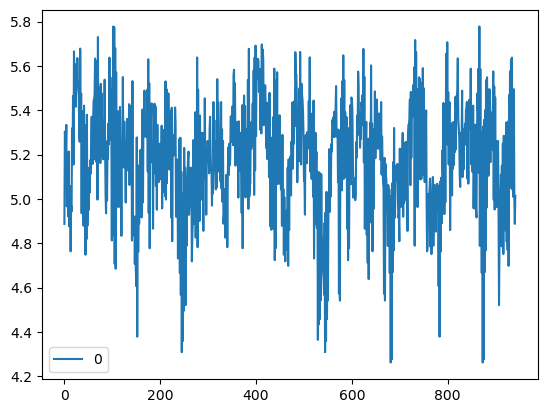

In [7]:
# generate random time series 10.000
T_A = np.random.randint(1,999,1000).astype(np.float64)
# T_A = np.array([1, 0, 5, 0, 3, 9, 0, 1, 9, 3, 1, 0]).astype(np.float64)
# T_B = np.array([1, 3, 5, 7, 9,11,13,15,16,18]).astype(np.float64)
m = 30
d = 2

mp_dil = stumpy.stump_dil(T_A=T_A, m=m, d=d)
discord_idx = np.argsort(mp_dil[:, 0])[-1] # startindex of discord with length m
motif_idx = np.argsort(mp_dil[:, 0])[0] # startindex of motif with length m
motif_nearest_neighbor_idx = mp_dil[motif_idx, 1] # startindex of motif with length m
pd.DataFrame(mp_dil[:,0]).plot()
print("Discord Index: ", discord_idx)
print("Discord Value: ", mp_dil[discord_idx, 0])
print("Motif Pair Indices: ", motif_idx, motif_nearest_neighbor_idx)
print("Motif Pair Value: ", mp_dil[motif_idx, 0], mp_dil[motif_nearest_neighbor_idx, 0])

/vol/fob-vol3/mi20/hirschmi/mp_dilation_master/stumpy_master_mp_dilation/stumpy/core.py:67: UserWarning: Excluding `['normalize', 'p']` parameters, function `stump_dil(['T_A', 'm', 'T_B', 'ignore_trivial', 'k', 'd']) and function `aamp(['T_A', 'm', 'T_B', 'ignore_trivial', 'k']) have different arguments/parameters.
  warnings.warn(msg)


[[0.725621964223909 6 -1 6]
 [0.0 6 -1 6]
 [1.84354823409306 7 0 7]
 [2.6709349335069326 7 1 7]
 [2.8220490803889167 0 0 6]
 [2.449489742783178 0 0 7]
 [0.0 1 1 -1]
 [0.7475294984100295 1 1 -1]]


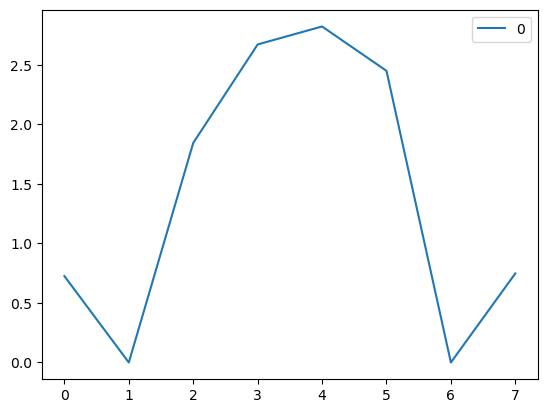

In [3]:
T_A = np.array([1, 0, 5, 9, 3, 1, 0, 1, 9, 3, 1, 0]).astype(np.float64)
# T_B = np.array([1, 3, 5, 7, 9,11,13,15,16,18]).astype(np.float64)
m = 3
d = 2

mp_dil = stumpy.stump_dil(T_A=T_A, m=m, d=d)
pd.DataFrame(mp_dil[:,0]).plot()
print(mp_dil)

# mp = stumpy.stump(T_A=T_A, m=m)
# pd.DataFrame(mp[:,0]).plot()
# print(mp)


# mp[mp_idx, 0] -> Euclidean Distance
# mp[mp_idx, 1] -> Index Nearest Neighbor
# mp[mp_idx, 2] -> Index “left” Nearest Neighbor for self-join
# mp[mp_idx, 3] -> Index “right” Nearest Neighbor for self-join
# bei AB-join: len(A) >= len(B)